## This notebook scrapes the CIA World Factbook website and downloads the text data for any country of your choosing (or all of them)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

### Ignore SSL certificate errors, send HHTP request, and read the HTML

In [2]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Read the HTML from the URL and pass on to BeautifulSoup
url = 'https://www.cia.gov/library/publications/the-world-factbook/'
print("Opening the file connection...")
uh= urllib.request.urlopen(url, context=ctx)
print("HTTP status",uh.getcode())
html =uh.read().decode()
print("Reading done. Total {len(html)} characters read.")

Opening the file connection...
HTTP status 200
Reading done. Total {len(html)} characters read.


### Parse the front-page HTML using BeautifulSoup and print it

In [3]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="css/publications.css" rel="stylesheet" type="text/css"/>
  <link href="css/publications-detail.css" rel="stylesheet" type="text/css"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   The World Factbook — Central Intelligence Agency
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="Apr 01, 2016" name="LastModified"/>
  <link href="css/jobcart.css" rel="stylesheet"/>
  <link href="css/smallscreen.css" rel="st

### Extract the country names and codes from the parsed HTML doc

In [6]:
country_codes=[]
country_names=[]
for tag in soup.find_all('option'):
    country_codes.append(tag.get('value')[5:7])
    country_names.append(tag.text)

temp=country_codes.pop(0) # To remove the first entry 'World'
temp=country_names.pop(0) # To remove the first entry 'World'

In [7]:
print('COUNTRY NAMES\n'+'-'*30)
for country in country_names[1:]:
    print(country,end=',')
print('\n\nCOUNTRY CODES\n'+'-'*30)
for country in country_codes[1:]:
    print(country,end=',')

COUNTRY NAMES
------------------------------
 Afghanistan , Akrotiri , Albania , Algeria , American Samoa , Andorra , Angola , Anguilla , Antarctica , Antigua and Barbuda , Arctic Ocean , Argentina , Armenia , Aruba , Ashmore and Cartier Islands , Atlantic Ocean , Australia , Austria , Azerbaijan , Bahamas, The , Bahrain , Baker Island , Bangladesh , Barbados , Belarus , Belgium , Belize , Benin , Bermuda , Bhutan , Bolivia , Bosnia and Herzegovina , Botswana , Bouvet Island , Brazil , British Indian Ocean Territory , British Virgin Islands , Brunei , Bulgaria , Burkina Faso , Burma , Burundi , Cabo Verde , Cambodia , Cameroon , Canada , Cayman Islands , Central African Republic , Chad , Chile , China , Christmas Island , Clipperton Island , Cocos (Keeling) Islands , Colombia , Comoros , Congo, Democratic Republic of the , Congo, Republic of the , Cook Islands , Coral Sea Islands , Costa Rica , Cote d'Ivoire , Croatia , Cuba , Curacao , Cyprus , Czechia , Denmark , Dhekelia , Djibouti 

### Extract the demographics

In [8]:
# Base URL
urlbase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
demographics1=[]
demographics2=[]
demographics3=[]
demographics4=[]
demographics5=[]

offset = len('65 years and over: ')

# Iterate over every country
for i in range(1,len(country_names)-1):
    country_html=country_codes[i]+'.html'
    url_to_get=urlbase+country_html
    # Read the HTML from the URL and pass on to BeautifulSoup
    html = urllib.request.urlopen(url_to_get, context=ctx).read()
    soup = BeautifulSoup(html, 'html.parser')
    
    txt=soup.get_text()
    pos1=txt.find('0-14 years: ')
    pos2=txt.find('15-24 years: ')
    pos3=txt.find('25-54 years: ')
    pos4=txt.find('55-64 years: ')
    pos5=txt.find('65 years and over: ')
    
    if pos1==-1:
        print("**0-14 years % data not found for {country_names[i]}!**")
        demographics1.append(np.nan)
    else:
        text=txt[pos1+12:pos1+18]
        end=re.search('%',text).start()
        a=float((txt[pos1+12:pos1+12+end]))
        demographics1.append(a)
        print("0-14 years % data extraction complete for {country_names[i]}!")
    
    if pos2==-1:
        print("**15-24 years % data not found for {country_names[i]}!**")
        demographics2.append(np.nan)
    else:
        text=txt[pos2+13:pos2+19]
        end=re.search('%',text).start()
        a=float((txt[pos2+13:pos2+13+end]))
        demographics2.append(a)
        print("15-24 years % data extraction complete for {country_names[i]}!")
        
    if pos3==-1:
        print("**25-54 years % data not found for {country_names[i]}!**")
        demographics3.append(np.nan)
    else:
        text=txt[pos3+13:pos3+19]
        end=re.search('%',text).start()
        a=float((txt[pos3+13:pos3+13+end]))
        demographics3.append(a)
        print("25-54 years % data extraction complete for {country_names[i]}!")
    
    if pos4==-1:
        print("**55-64 years % data not found for {country_names[i]}!**")
        demographics4.append(np.nan)
    else:
        text=txt[pos4+13:pos4+19]
        end=re.search('%',text).start()
        a=float((txt[pos4+13:pos4+13+end]))
        demographics4.append(a)
        print("55-64 years % data extraction complete for {country_names[i]}!")
    
    
    if pos5==-1:
        print("**65 years and beyond % data not found for {country_names[i]}!**")
        demographics5.append(np.nan)
    else:
        text=txt[pos5+offset:pos5+offset+6]
        end=re.search('%',text).start()
        a=float((txt[pos5+offset:pos5+offset+end]))
        demographics5.append(a)
        print("65 years and beyond % data extraction complete for {country_names[i]}!")

0-14 years % data extraction complete for {country_names[i]}!
15-24 years % data extraction complete for {country_names[i]}!
25-54 years % data extraction complete for {country_names[i]}!
55-64 years % data extraction complete for {country_names[i]}!
65 years and beyond % data extraction complete for {country_names[i]}!
**0-14 years % data not found for {country_names[i]}!**
**15-24 years % data not found for {country_names[i]}!**
**25-54 years % data not found for {country_names[i]}!**
**55-64 years % data not found for {country_names[i]}!**
**65 years and beyond % data not found for {country_names[i]}!**
0-14 years % data extraction complete for {country_names[i]}!
15-24 years % data extraction complete for {country_names[i]}!
25-54 years % data extraction complete for {country_names[i]}!
55-64 years % data extraction complete for {country_names[i]}!
65 years and beyond % data extraction complete for {country_names[i]}!
0-14 years % data extraction complete for {country_names[i]}!
15

In [10]:
data={
    '0-14 years old %':demographics1,
    '15-24 years %':demographics2,
    '25-54 years %':demographics3,
    '55-64 years %':demographics4,
    '65 years and above %':demographics5
}
#df1=pd.DataFrame(data=data,index=country_names[1:5])
df_demo=pd.DataFrame(data=data,index=country_names[1:len(country_codes)-1])
df_demo.index.name='COUNTRY'
df_demo.dropna(inplace=True)
df_demo

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %
COUNTRY,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59
Albania,18.05,17.47,41.06,11.54,11.89
Algeria,29.31,15.30,42.93,6.81,5.65
American Samoa,30.28,18.79,36.38,8.58,5.97
Andorra,14.40,9.64,46.18,14.16,15.61
Angola,48.12,18.25,28.03,3.26,2.34
Anguilla,22.21,14.08,43.82,11.06,8.84
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06
Argentina,24.59,15.28,39.38,9.13,11.62


### Save the data in an Excel file

In [11]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Demo1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_demo.to_excel(writer, sheet_name='Demographics')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

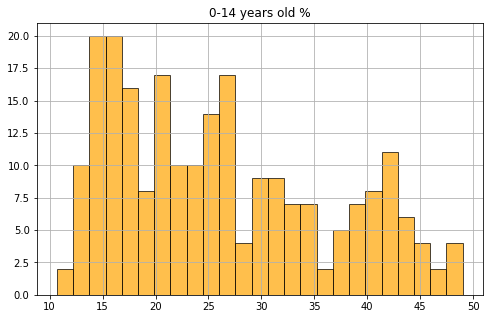

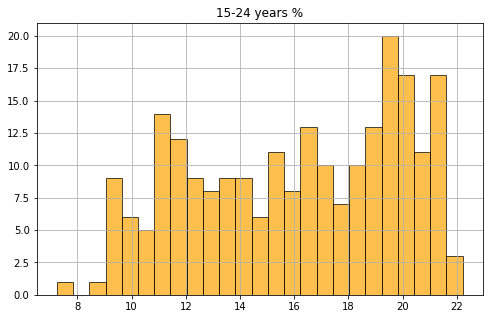

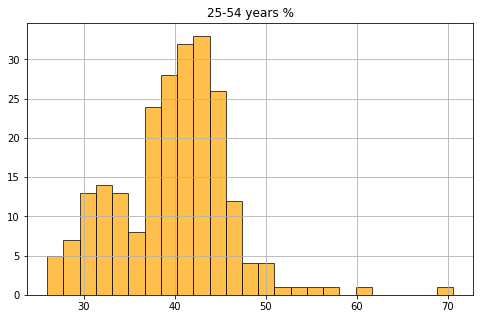

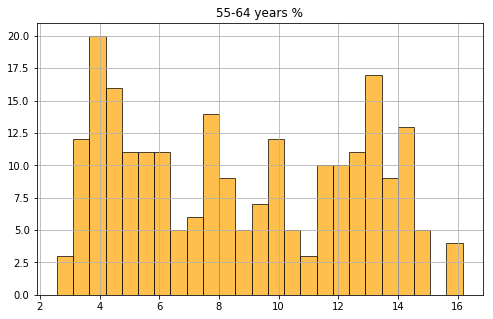

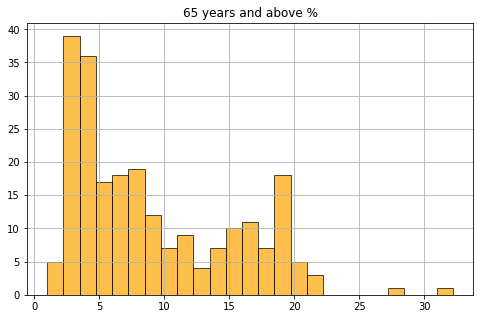

In [12]:
for i in range(5):
    df_demo.hist(df_demo.columns[i],bins=25,figsize=(8,5),color='orange',edgecolor='k',alpha=0.7)
    plt.show()

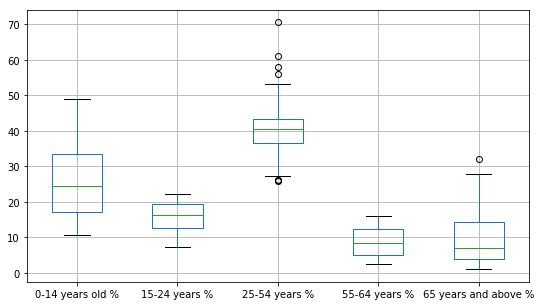

In [13]:
df_demo.boxplot(figsize=(9,5))
plt.show()

### Download all text data and save in a pickle file for easy later access

In [15]:
# Base URL
urlbase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
# Empty data dictionary
text_data=dict()

# Iterate over every country
for i in range(1,len(country_names)-1):
    country_html=country_codes[i]+'.html'
    url_to_get=urlbase+country_html
    # Read the HTML from the URL and pass on to BeautifulSoup
    html = urllib.request.urlopen(url_to_get, context=ctx).read()
    soup = BeautifulSoup(html, 'html.parser')
    txt=soup.get_text()
    text_data[country_names[i]]=txt
    print("Finished loading data for {country_names[i]}")
    
print ("\n**Finished downloading all text data!**")

Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished l

In [16]:
import pickle
pickle.dump(text_data,open("text_data_CIA_Factobook.p", "wb"))

In [17]:
text_data = pickle.load(open("text_data_CIA_Factobook.p", "rb"))

In [18]:
avg = 0
total=0
for k,v in text_data.items():
    total+=len(v)
print("Total length",total)
avg=total/len(text_data)
print("Average length",avg)

Total length 12564171
Average length 47233.72556390977


In [19]:
text_data.keys()

dict_keys([' Czechia ', ' United States ', ' Namibia ', ' Denmark ', ' Guatemala ', ' Tokelau ', ' Cameroon ', ' France ', ' Sint Maarten ', ' Azerbaijan ', ' Saint Pierre and Miquelon ', ' Kiribati ', ' Faroe Islands ', ' Austria ', ' Jan Mayen ', ' French Southern and Antarctic Lands ', ' Belize ', ' Greenland ', ' Burkina Faso ', ' Singapore ', ' Ethiopia ', ' Jamaica ', ' Barbados ', ' Falkland Islands (Islas Malvinas) ', ' Sudan ', ' Benin ', ' Yemen ', ' Iceland ', ' Kazakhstan ', ' Macedonia ', ' Jersey ', ' Togo ', ' Bahrain ', ' Qatar ', ' Madagascar ', ' Maldives ', ' Latvia ', ' Pacific Ocean ', ' Mauritania ', ' Rwanda ', ' Italy ', ' El Salvador ', ' Curacao ', ' Bangladesh ', ' Jordan ', ' Ghana ', ' Kenya ', ' Belgium ', ' Johnston Atoll ', ' Lebanon ', ' Iran ', ' Saint Barthelemy ', ' American Samoa ', ' Brunei ', ' Timor-Leste ', ' Korea, South ', ' Niue ', ' Liberia ', ' Sweden ', ' Baker Island ', ' Aruba ', ' Paracel Islands ', ' Nepal ', ' Bermuda ', ' Netherlands

### Function to convert a string with a comma (e.g. a GDP value) to a float

In [20]:
def convert_float(string):
    if string.isnumeric():
        return float(string)
    if string[0].isdigit():
        if ',' not in string and '.' in string:
            return float(string)
        if ',' not in string and '.' not in string:
            idx=string.find(' ')
            result = string[:idx]
            return float(result)
        idx1=string.find(',')
        idx2=string.find(' ')
        result = string[:idx1]+string[idx1+1:idx2]
        return float(result)
    else:
        return (-1)

### Extract Total GDP (PPP) (in billion $)

In [21]:
# Initialize dictionary for holding the data
Total_GDP_PPP = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('GDP (purchasing power parity):')
    if pos!=-1: 
        pos= pos+len('GDP (purchasing power parity):')
        string = txt[pos+1:pos+15]
        start = re.search('\$',string)
        end = re.search('[b,t]',string)
        if (start!=None and end!=None):
            start=start.start()
            end=end.start()
            a=string[start+1:start+end-1]
            print(a)
            a = convert_float(a)
            if (string[end]=='t'):
                # If the GDP was in trillions, multiply it by 1000
                a=1000*a
            #print(f"Total GDP (PPP) of {country}: {a} billion")
            # Insert the data in the dictionary
            Total_GDP_PPP[country]=a
        else:
            print("**Could not find GDP data!**")
    else:
        print("**Could not find GDP data!**")

print ("\nFinished finding all GDP (Purchasing Power Parity) (in billion $) data")

69.51
**Could not find GDP data!**
35.87
629.3
**Could not find GDP data!**
3.327
192
**Could not find GDP data!**
**Could not find GDP data!**
2.39
**Could not find GDP data!**
911.5
27.21
2.516
**Could not find GDP data!**
**Could not find GDP data!**
1.235
434.1
166.8
9.339
69.77
**Could not find GDP data!**
686.5
4.919
175.9
526.4
3.23
25.29
5.198
7.011
83.5
43.85
39.55
**Could not find GDP data!**
3.219
**Could not find GDP data!**
**Could not find GDP data!**
32.91
152.4
35.68
330.9
7.985
3.734
64.21
81.55
1.764
2.507
3.395
29.64
452.1
23.12
NA
Agricu
**Could not find GDP data!**
**Could not find GDP data!**
712.5
1.323
67.99
29.16
**Could not find GDP data!**
**Could not find GDP data!**
85.2
96.27
100.2
132.9
3.128
31.19
372.6
285.5
**Could not find GDP data!**
3.64
**Could not find GDP data!**
172.6
188.5
1.199
56.9
29.38
9.631
41.2
195.8
**Could not find GDP data!**
2.001
8.647
242.4
2.826
5.49
**Could not find GDP data!**
36.75
3.582
**Could not find GDP data!**
39.32
4.15
1

### Extract GDP/capita (PPP) for every country wherever possible

In [24]:
# Initialize dictionary for holding the data
GDP_PPP = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('GDP - per capita (PPP):')
    if pos!=-1:
        pos= pos+len('GDP - per capita (PPP):')
        string = txt[pos+1:pos+11]
        start = re.search('\$',string)
        end = re.search('\S',string)
        if (start!=None and end!=None):
            start=start.start()
            end=end.start()
            a=string[start+1:start+end-1]
            #print(a)
            a = convert_float(a)
            if (a!=-1.0):
                print("GDP/capita (PPP) of {country}: {a} dollars")
                # Insert the data in the dictionary
                GDP_PPP[country]=a
            else:
                print("**Could not find GDP/capita data!**")
        else:
            print("**Could not find GDP/capita data!**")
    else:
        print("**Could not find GDP/capita data!**")

print ("\nFinished finding all GDP/capita data")

GDP/capita (PPP) of {country}: {a} dollars
**Could not find GDP/capita data!**
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
**Could not find GDP/capita data!**
GDP/capita (PPP) of {country}: {a} dollars
**Could not find GDP/capita data!**
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
**Could not find GDP/capita data!**
**Could not find GDP/capita data!**
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
**Could not find GDP/capita data!**
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita (PPP) of {country}: {a} dollars
GDP/capita

In [25]:
df_GDP=pd.Series(GDP_PPP).to_frame()

In [26]:
df_GDP.columns=['GDP (PPP)']
df_GDP.index.name='COUNTRY'

In [27]:
df_GDP

,GDP (PPP)
COUNTRY,
Afghanistan,1900.0
Albania,12500.0
Algeria,15100.0
American Samoa,13000.0
Andorra,49900.0
Angola,6800.0
Anguilla,12200.0
Antigua and Barbuda,26300.0
Argentina,20700.0


In [28]:
df_Total_GDP=pd.Series(Total_GDP_PPP).to_frame()

In [29]:
df_Total_GDP.columns=['Total GDP (PPP)']
df_Total_GDP.index.name='COUNTRY'

In [30]:
df_combined = df_demo.join(df_GDP)
df_combined.dropna(inplace=True)

In [31]:
df_combined = df_combined.join(df_Total_GDP)
df_combined.dropna(inplace=True)

In [32]:
df_combined

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP)
COUNTRY,,,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59,1900.0,69.510
Albania,18.05,17.47,41.06,11.54,11.89,12500.0,35.870
Algeria,29.31,15.30,42.93,6.81,5.65,15100.0,629.300
Andorra,14.40,9.64,46.18,14.16,15.61,49900.0,3.327
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.000
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06,26300.0,2.390
Argentina,24.59,15.28,39.38,9.13,11.62,20700.0,911.500
Armenia,18.94,12.89,43.43,13.41,11.33,9100.0,27.210
Aruba,17.64,12.78,41.72,14.28,13.59,25300.0,2.516


### GDP growth rate

In [34]:
# Initialize dictionary for holding the data
GDP_growth = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('GDP - real growth rate:')
    if pos!=-1: 
        pos= pos+len('GDP - real growth rate: ')
        string = txt[pos:pos+12]
        end = re.search('%',string)
        if (end!=None):
            end=end.start()
            a=string[:end]
            if a[-1].isdigit():
                a = float(a)
                print("GDP growth rate of {country}: {a}")
                # Insert the data in the dictionary
                GDP_growth[country]=a
            else:
                print("**Could not find GDP growth rate data!**")
        else:
            print("**Could not find GDP growth rate data!**")
    else:
        print("**Could not find GDP growth rate data!**")

print ("\nFinished finding all GDP growth rate data")

GDP growth rate of {country}: {a}
**Could not find GDP growth rate data!**
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
**Could not find GDP growth rate data!**
GDP growth rate of {country}: {a}
**Could not find GDP growth rate data!**
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
**Could not find GDP growth rate data!**
**Could not find GDP growth rate data!**
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
**Could not find GDP growth rate data!**
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP growth rate of {country}: {a}
GDP gr

In [35]:
df_GDP_growth=pd.Series(GDP_growth).to_frame()
df_GDP_growth.columns=['GDP growth rate (%)']
df_GDP_growth.index.name='COUNTRY'
df_GDP_growth

,GDP growth rate (%)
COUNTRY,
Afghanistan,2.5
Albania,3.7
Algeria,1.5
American Samoa,-2.4
Andorra,-1.1
Angola,1.5
Anguilla,-8.5
Antigua and Barbuda,2.7
Argentina,2.5


In [36]:
df_combined = df_combined.join(df_GDP_growth)
df_combined.dropna(inplace=True)
df_combined

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP),GDP growth rate (%)
COUNTRY,,,,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59,1900.0,69.510,2.5
Albania,18.05,17.47,41.06,11.54,11.89,12500.0,35.870,3.7
Algeria,29.31,15.30,42.93,6.81,5.65,15100.0,629.300,1.5
Andorra,14.40,9.64,46.18,14.16,15.61,49900.0,3.327,-1.1
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.000,1.5
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06,26300.0,2.390,2.7
Argentina,24.59,15.28,39.38,9.13,11.62,20700.0,911.500,2.5
Armenia,18.94,12.89,43.43,13.41,11.33,9100.0,27.210,3.5
Aruba,17.64,12.78,41.72,14.28,13.59,25300.0,2.516,2.4


### Internet users %

In [38]:
# Initialize dictionary for holding the data
Internet_user = {}
# Iterate over every country
for i in range(1,len(country_names)-1):
    country= country_names[i]
    txt=text_data[country]       
    pos = txt.find('Internet users:')
    if pos!=-1: 
        pos= pos+len('Internet users: ')
        string = txt[pos:pos+50]
        #print(string)
        start=re.search('percent of population: ',string)
        end = re.search('%',string)
        if (start!=None and end!=None):
            start=start.end()
            end=end.start()
            a=string[start:end]
            if a[-1].isdigit():
                a = float(a)
                print("Internet users % of {country}: {a}")
                # Insert the data in the dictionary
                Internet_user[country]=a
            else:
                print("**Could not find Internet users data!**")
        else:
            print("**Could not find Internet users data!**")
    else:
        print("**Could not find Internet users data!**")

print ("\nFinished finding all Internet users data")

Internet users % of {country}: {a}
**Could not find Internet users data!**
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
**Could not find Internet users data!**
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
**Could not find Internet users data!**
**Could not find Internet users data!**
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
**Could not find Internet users data!**
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}: {a}
Internet users % of {country}:

In [39]:
df_Internet_user=pd.Series(Internet_user).to_frame()
df_Internet_user.columns=['Internet users (%)']
df_Internet_user.index.name='COUNTRY'
df_Internet_user

,Internet users (%)
COUNTRY,
Afghanistan,10.6
Albania,66.4
Algeria,42.9
American Samoa,31.3
Andorra,97.9
Angola,13.0
Anguilla,81.6
Antarctica,100.0
Antigua and Barbuda,65.2


In [40]:
df_combined = df_combined.join(df_Internet_user)
df_combined.dropna(inplace=True)
df_combined

,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP),GDP growth rate (%),Internet users (%)
COUNTRY,,,,,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59,1900.0,69.510,2.5,10.6
Albania,18.05,17.47,41.06,11.54,11.89,12500.0,35.870,3.7,66.4
Algeria,29.31,15.30,42.93,6.81,5.65,15100.0,629.300,1.5,42.9
Andorra,14.40,9.64,46.18,14.16,15.61,49900.0,3.327,-1.1,97.9
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.000,1.5,13.0
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06,26300.0,2.390,2.7,65.2
Argentina,24.59,15.28,39.38,9.13,11.62,20700.0,911.500,2.5,70.2
Armenia,18.94,12.89,43.43,13.41,11.33,9100.0,27.210,3.5,62.0
Aruba,17.64,12.78,41.72,14.28,13.59,25300.0,2.516,2.4,93.5


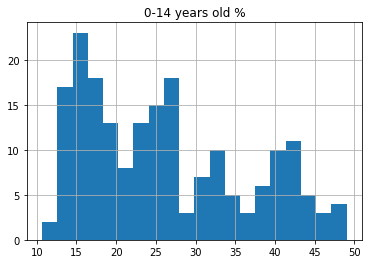

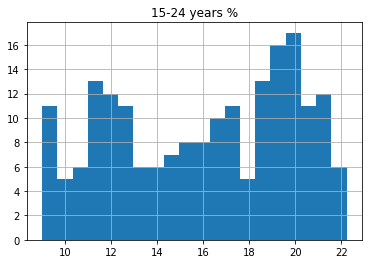

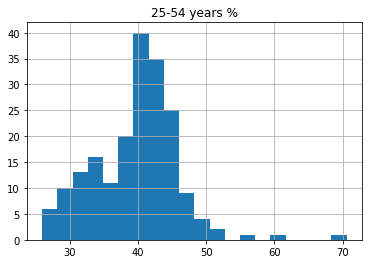

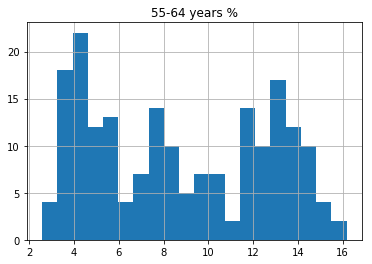

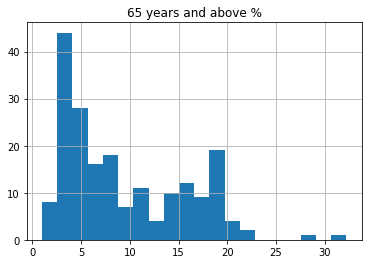

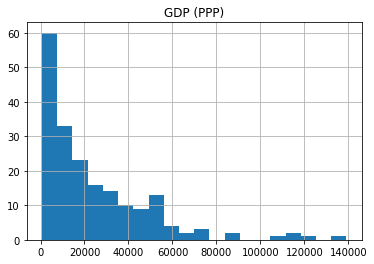

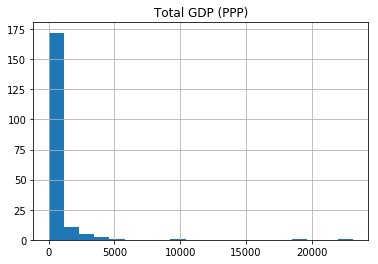

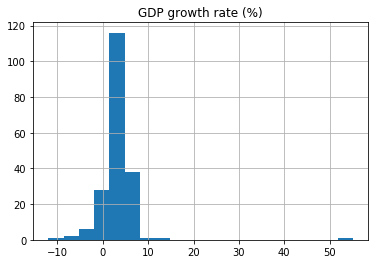

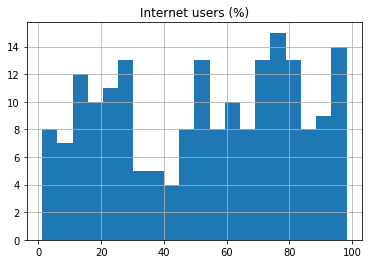

In [41]:
for c in df_combined.columns:
    df_combined.hist(c,bins=20)
    plt.show()

In [42]:
df_combined[df_combined['Internet users (%)']<20][df_combined['GDP (PPP)']>5000]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,0-14 years old %,15-24 years %,25-54 years %,55-64 years %,65 years and above %,GDP (PPP),Total GDP (PPP),GDP growth rate (%),Internet users (%)
COUNTRY,,,,,,,,,
Angola,48.12,18.25,28.03,3.26,2.34,6800.0,192.00,1.5,13.0
"Congo, Republic of the",41.67,17.10,33.89,4.29,3.06,6700.0,29.16,-3.6,7.6
Laos,32.76,21.17,36.70,5.48,3.89,7400.0,49.21,6.9,18.2
Pakistan,31.36,21.14,37.45,5.57,4.48,5400.0,1056.00,5.3,15.5
Turkmenistan,25.79,18.39,43.18,7.90,4.74,18700.0,103.50,6.5,18.0


In [43]:
import seaborn as sns
from scipy.stats import linregress

### Internet users % vs. GDP/capita for middle-income (GDP) countries

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


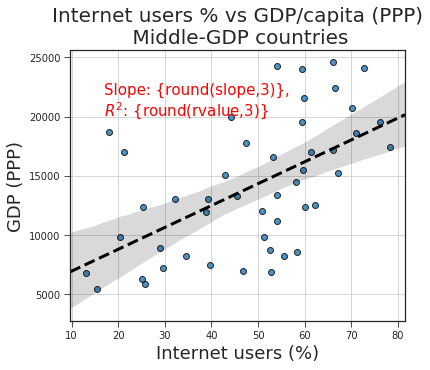

In [46]:
sns.set_style('ticks')
# Create a filtered data frame and x and y arrays
filter_gdp = df_combined['Total GDP (PPP)'] > 50
filter_low_income=df_combined['GDP (PPP)']>5000
filter_high_income=df_combined['GDP (PPP)']<25000

df_filtered = df_combined[filter_gdp][filter_low_income][filter_high_income]
x_array = df_filtered['Internet users (%)']
y_array = df_filtered['GDP (PPP)']
    
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Internet users (%)",fontsize=18)
ax.set_ylabel("GDP/capita (PPP) in US dollars",fontsize=18)
ax.set_title("Internet users % vs GDP/capita (PPP)\n Middle-GDP countries",fontsize=20)
fig.set_size_inches(6, 5)
g=sns.regplot(data=df_filtered,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                 scatter_kws={'edgecolor':'k'})
# Linear regression calculations
slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
# Get the bottom, top, left, and right limits
bottom,top = ax.get_ylim()
left,right = ax.get_xlim()
    
ax.text(s="Slope: {round(slope,3)},\n$R^2$: {round(rvalue,3)}",
            x=left+(right-left)*0.1,y=top-(top-bottom)*0.25,fontsize=15,color='red')
plt.show()

### Internet users % vs. GDP/capita for low-income (GDP) countries

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


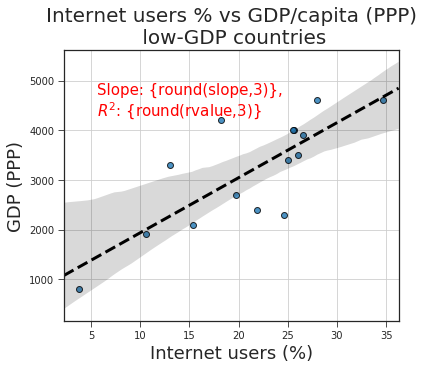

In [49]:
# Create a filtered data frame and x and y arrays
filter_gdp = df_combined['Total GDP (PPP)'] > 50
filter_low_income=df_combined['GDP (PPP)']<5000

df_filtered = df_combined[filter_gdp][filter_low_income]
x_array = df_filtered['Internet users (%)']
y_array = df_filtered['GDP (PPP)']
    
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Internet users (%)",fontsize=18)
ax.set_ylabel("GDP/capita (PPP), in US $",fontsize=18)
ax.set_title("Internet users % vs GDP/capita (PPP)\n low-GDP countries",fontsize=20)
fig.set_size_inches(6, 5)
g=sns.regplot(data=df_filtered,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                 scatter_kws={'edgecolor':'k'})
# Linear regression calculations
slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
# Get the bottom, top, left, and right limits
bottom,top = ax.get_ylim()
left,right = ax.get_xlim()
    
ax.text(s="Slope: {round(slope,3)},\n$R^2$: {round(rvalue,3)}",
            x=left+(right-left)*0.1,y=top-(top-bottom)*0.25,fontsize=15,color='red')
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


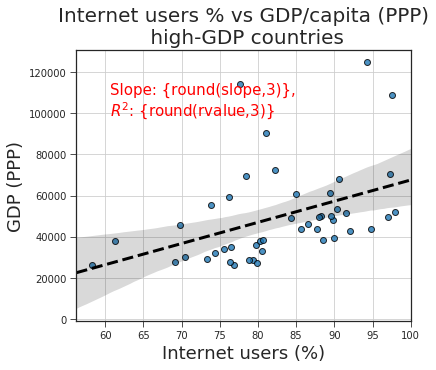

In [51]:
# Create a filtered data frame and x and y arrays
filter_gdp = df_combined['Total GDP (PPP)'] > 50
filter_high_income=df_combined['GDP (PPP)']>25000

df_filtered = df_combined[filter_gdp][filter_high_income]
x_array = df_filtered['Internet users (%)']
y_array = df_filtered['GDP (PPP)']
    
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("Internet users (%)",fontsize=18)
ax.set_ylabel("GDP/capita (PPP)",fontsize=18)
ax.set_title("Internet users % vs GDP/capita (PPP)\n high-GDP countries",fontsize=20)
fig.set_size_inches(6, 5)
g=sns.regplot(data=df_filtered,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                 scatter_kws={'edgecolor':'k'})
# Linear regression calculations
slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
# Get the bottom, top, left, and right limits
bottom,top = ax.get_ylim()
left,right = ax.get_xlim()
    
ax.text(s="Slope: {round(slope,3)},\n$R^2$: {round(rvalue,3)}",
            x=left+(right-left)*0.1,y=top-(top-bottom)*0.25,fontsize=15,color='red')
plt.show()

In [52]:
df_combined.loc[' India ']

0-14 years old %          27.34
15-24 years %             17.90
25-54 years %             41.08
55-64 years %              7.45
65 years and above %       6.24
GDP (PPP)               7200.00
Total GDP (PPP)         9447.00
GDP growth rate (%)        6.70
Internet users (%)        29.50
Name:  India , dtype: float64

In [53]:
df_combined.columns

Index(['0-14 years old %', '15-24 years %', '25-54 years %', '55-64 years %',
       '65 years and above %', 'GDP (PPP)', 'Total GDP (PPP)',
       'GDP growth rate (%)', 'Internet users (%)'],
      dtype='object')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


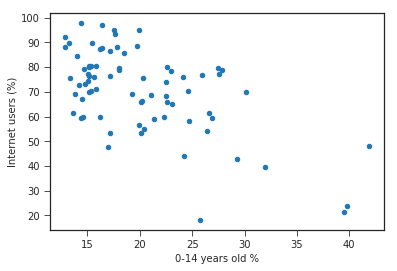

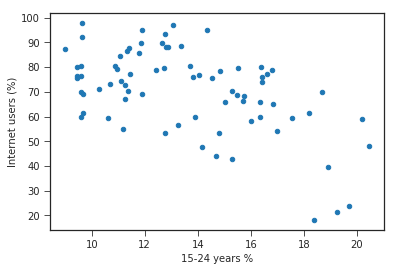

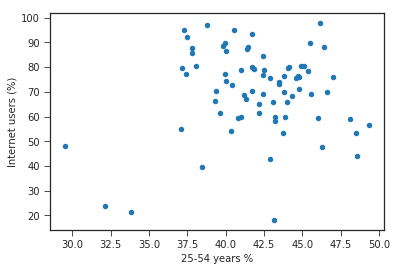

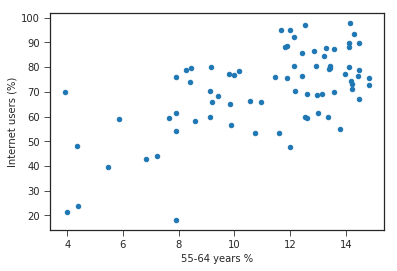

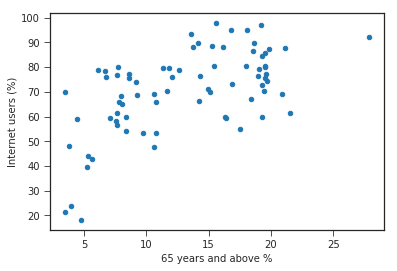

In [55]:
filter1=df_combined['GDP (PPP)']>15000
filter2=df_combined['GDP (PPP)']<50000
df_filtered = df_combined[filter1][filter2]

for c in df_filtered.columns[0:5]:
    df_filtered.plot.scatter(x=c, y='Internet users (%)')